# DATA PROCESSES ASSIGNMENT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from collections import defaultdict
from IPython.display import display

## Understand the business
Clearly define your business and note down the problem you are solving. Do a fundamental analysis on whether providing a data solution will add value to your customer and company or not.

TODO

In this regard,
you must consider univariate and bivariate analysis, survival curves (e.g.,
Kaplan–Meier), and any other analysis that may help to understand the survival
of a patient. You must also train and test different models to predict the
survival (the most important part of the technical execution is the previous
analysis though).



Steps in Data Exploration and Preprocessing:\
Identification of variables and data types\
Analyzing the basic metrics\
Non-Graphical Univariate Analysis\
Graphical Univariate Analysis\
Bivariate Analysis\
Variable transformations\
Missing value treatment\
Outlier treatment\
Correlation Analysis\
Dimensionality Reduction\

TODO
https://towardsai.net/p/data-analysis/exploratory-data-analysis-in-python-ebdf643a33f6

https://mode.com/blog/python-data-visualization-libraries/

## Data exploration and data preprocessing
Do you have enough data? — Ask this question if you don’t have data, don’t waste your time and money in making models, evaluating — stop it. Many data science projects are not profitable. Collect data first and build a long-term pipeline of structured data collection. Go for digital transformation, add digital data collection and wait. It is a long-term investment.
Collect your data and guard it with all your might. Self-data collection is a gold mine which only you have it and no one else.

We see that initialy, the dataset has a column called ID (unuseful for us then we remove it).

In [157]:
df = pd.read_csv(filepath)
df

,ID,AGE,SEX,DAYS_HOSPITAL,DAYS_ICU,EXITUS,DESTINATION,TEMP,HEART_RATE,GLUCOSE,SAT_O2,BLOOD_PRES_SYS,BLOOD_PRES_DIAS
0,1,15.0,FEMALE,4,0,NO,NaN,37.0,0,0,92,0,0
1,2,18.0,FEMALE,4,0,NO,ADMISSION,37.3,105,0,97,0,0
2,3,21.0,MALE,7,0,NO,NaN,38.5,112,0,95,85,47
3,4,21.0,MALE,10,0,NO,ADMISSION,39.2,113,0,97,0,0
4,5,22.0,MALE,4,0,NO,NaN,36.3,80,0,92,111,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,2050,189.0,FEMALE,11,3,NO,ADMISSION,0.0,0,0,0,0,0
2050,2051,NaN,FEMALE,3,0,NO,NaN,36.5,0,0,0,0,0
2051,2052,NaN,FEMALE,6,6,NO,NaN,36.8,190,0,98,0,0
2052,2053,NaN,MALE,5,0,NO,NaN,0.0,120,0,93,0,0


In [2]:
filepath = "COVID19_data.csv"
col_names = ["id", "age", "sex", "days_hospital", "days_icu", "exitus", "destination", "temp", "heart_rate", "glucose", "sat_o2", "blood_pres_sys", "blood_pres_dias"]
df = pd.read_csv(filepath, header=0, names=col_names).drop("id", axis=1)

#### Identification of variables and data types
We identify the number of patients and the variables that we have and we take a look to the header and the end of the dataset to inspect it. We also identify the type of data that each variable has.

In [3]:
print(f"Number of patients: {df.shape[0]}")
print(f"Number of variables to study: {df.shape[1]}")
df.head(5)

Number of patients: 2054
Number of variables to study: 12


,age,sex,days_hospital,days_icu,exitus,destination,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
0,15.0,FEMALE,4,0,NO,NaN,37.0,0,0,92,0,0
1,18.0,FEMALE,4,0,NO,ADMISSION,37.3,105,0,97,0,0
2,21.0,MALE,7,0,NO,NaN,38.5,112,0,95,85,47
3,21.0,MALE,10,0,NO,ADMISSION,39.2,113,0,97,0,0
4,22.0,MALE,4,0,NO,NaN,36.3,80,0,92,111,70


In [4]:
df.tail(5)

,age,sex,days_hospital,days_icu,exitus,destination,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
2049,189.0,FEMALE,11,3,NO,ADMISSION,0.0,0,0,0,0,0
2050,NaN,FEMALE,3,0,NO,NaN,36.5,0,0,0,0,0
2051,NaN,FEMALE,6,6,NO,NaN,36.8,190,0,98,0,0
2052,NaN,MALE,5,0,NO,NaN,0.0,120,0,93,0,0
2053,NaN,MALE,3,0,NO,NaN,36.8,0,0,0,0,0


In [5]:
print(f"Data types in Covid-19 dataset: \n\n{df.dtypes}")

Data types in Covid-19 dataset: 

age                float64
sex                 object
days_hospital        int64
days_icu             int64
exitus              object
destination         object
temp               float64
heart_rate           int64
glucose              int64
sat_o2               int64
blood_pres_sys       int64
blood_pres_dias      int64
dtype: object


##### Null values treatment
We identify null values and if we have null values in categorical variables we replace that null values by the most frequent values and transform it to numerical. The null values in numerical we repalce that nulls by the mean.

In [6]:
print(df.isnull().any())

age                 True
sex                 True
days_hospital      False
days_icu           False
exitus              True
destination         True
temp               False
heart_rate         False
glucose            False
sat_o2             False
blood_pres_sys     False
blood_pres_dias    False
dtype: bool


In [7]:
# Categorical boolean mask
cat_mask = (df.dtypes == object)

# Filter categorical columns using mask and turn it into a list
cat_cols = df.columns[cat_mask].tolist()

df_cat = df[cat_cols]
df_num = df.drop(cat_cols, axis=1)

- Missing values in categorical features

In [8]:
imp_cat = SimpleImputer(strategy="most_frequent")
columns = df_cat.columns
index = df_cat.index
df_cat = pd.DataFrame(imp_cat.fit_transform(df_cat), columns=columns, index=index)
print(df_cat.isnull().any())

sex            False
exitus         False
destination    False
dtype: bool


In [9]:
d = defaultdict(preprocessing.LabelEncoder)
df_cat_le = df_cat.apply(lambda col: d[col.name].fit_transform(col))
print(df_cat_le)

      sex  exitus  destination
0       0       0            0
1       0       0            0
2       1       0            0
3       1       0            0
4       1       0            0
...   ...     ...          ...
2049    0       0            0
2050    0       0            0
2051    0       0            0
2052    1       0            0
2053    1       0            0

[2054 rows x 3 columns]


- Missing values in numerical features

In [11]:
imp_num = SimpleImputer(strategy="mean")
columns = df_num.columns
index = df_num.index
df_num = pd.DataFrame(imp_num.fit_transform(df_num), columns=columns, index=index)
print(df_num.isnull().any())

age                False
days_hospital      False
days_icu           False
temp               False
heart_rate         False
glucose            False
sat_o2             False
blood_pres_sys     False
blood_pres_dias    False
dtype: bool


In [156]:
df_preprocessed = pd.merge(left=df_cat_le, right=df_num, on=df.index).drop(["key_0","destination"], axis=1)
df_preprocessed.head(5)

,sex,exitus,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
0,0,0,15.0,4.0,0.0,37.0,0.0,0.0,92.0,0.0,0.0
1,0,0,18.0,4.0,0.0,37.3,105.0,0.0,97.0,0.0,0.0
2,1,0,21.0,7.0,0.0,38.5,112.0,0.0,95.0,85.0,47.0
3,1,0,21.0,10.0,0.0,39.2,113.0,0.0,97.0,0.0,0.0
4,1,0,22.0,4.0,0.0,36.3,80.0,0.0,92.0,111.0,70.0


In [155]:
df_preprocessed.tail(5)

,sex,exitus,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
2049,0,0,189.000000,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2050,0,0,70.856585,3.0,0.0,36.5,0.0,0.0,0.0,0.0,0.0
2051,0,0,70.856585,6.0,6.0,36.8,190.0,0.0,98.0,0.0,0.0
2052,1,0,70.856585,5.0,0.0,0.0,120.0,0.0,93.0,0.0,0.0
2053,1,0,70.856585,3.0,0.0,36.8,0.0,0.0,0.0,0.0,0.0


#### Analyzing basic metrics

In [13]:
df_preprocessed.describe()

,sex,exitus,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,0.598345,0.160175,70.856585,8.118793,0.355404,28.386319,70.787731,1.776047,73.397760,83.571568,48.328140
std,0.490352,0.366858,20.436992,6.177872,2.173721,15.419158,41.802038,20.434622,37.863716,67.450853,44.225438
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,57.000000,4.000000,0.000000,35.400000,63.000000,0.000000,81.000000,0.000000,0.000000
50%,1.000000,0.000000,68.000000,7.000000,0.000000,36.400000,84.000000,0.000000,93.000000,115.000000,64.000000
75%,1.000000,0.000000,98.000000,10.000000,0.000000,36.900000,98.000000,0.000000,96.000000,137.000000,79.000000
max,1.000000,1.000000,189.000000,98.000000,36.000000,40.100000,593.000000,448.000000,99.000000,772.000000,845.000000


#### Non-graphical univariate analysis
##### Count  values

In [14]:
df_preprocessed["age"].value_counts()

98.0     574
77.0     140
74.0     105
72.0      94
57.0      77
        ... 
15.0       1
30.0       1
189.0      1
102.0      1
101.0      1
Name: age, Length: 63, dtype: int64

In [15]:
df_preprocessed["days_hospital"].value_counts()

6.0     218
5.0     214
7.0     191
8.0     171
4.0     169
3.0     154
9.0     125
2.0     115
11.0    102
10.0     86
1.0      82
12.0     69
13.0     61
14.0     48
15.0     42
16.0     34
17.0     22
0.0      21
18.0     17
19.0     16
21.0     16
23.0     12
24.0     10
20.0      9
25.0      8
28.0      8
22.0      7
26.0      5
27.0      5
31.0      3
36.0      3
29.0      2
34.0      1
32.0      1
51.0      1
39.0      1
47.0      1
33.0      1
50.0      1
67.0      1
98.0      1
Name: days_hospital, dtype: int64

In [16]:
df_preprocessed["days_icu"].value_counts()

0.0     1947
1.0       29
2.0       11
3.0        7
8.0        6
6.0        6
5.0        6
11.0       5
4.0        5
9.0        5
10.0       4
7.0        4
13.0       3
16.0       3
12.0       2
24.0       2
20.0       2
27.0       1
15.0       1
19.0       1
21.0       1
25.0       1
14.0       1
36.0       1
Name: days_icu, dtype: int64

In [17]:
df_preprocessed["temp"].value_counts()

0.000000     467
36.500000    129
36.000000    116
36.600000    108
36.300000     93
36.800000     86
36.400000     80
36.700000     77
36.900000     74
36.200000     72
37.000000     67
36.100000     60
37.200000     50
37.300000     44
37.700000     40
35.900000     34
37.100000     32
37.400000     32
37.500000     27
38.000000     27
38.100000     27
35.800000     24
35.500000     24
37.600000     22
35.700000     22
38.300000     20
37.900000     18
38.500000     18
38.200000     17
37.800000     17
35.600000     16
35.400000     15
35.200000     12
35.300000     11
35.000000     10
38.600000      9
38.400000      8
38.700000      8
35.100000      8
38.900000      7
39.000000      6
38.800000      5
39.100000      3
39.800000      2
33.200000      1
34.100000      1
34.000000      1
40.100000      1
39.500000      1
39.200000      1
37.099998      1
34.600000      1
39.400000      1
34.900000      1
Name: temp, dtype: int64

In [18]:
df_preprocessed["heart_rate"].value_counts()

0.0      448
85.0      65
80.0      55
100.0     53
84.0      46
        ... 
21.0       1
150.0      1
140.0      1
52.0       1
167.0      1
Name: heart_rate, Length: 101, dtype: int64

In [19]:
df_preprocessed["glucose"].value_counts()

0.0      2035
171.0       1
139.0       1
99.0        1
272.0       1
170.0       1
332.0       1
80.0        1
219.0       1
287.0       1
111.0       1
140.0       1
448.0       1
123.0       1
97.0        1
93.0        1
242.0       1
184.0       1
214.0       1
227.0       1
Name: glucose, dtype: int64

In [20]:
df_preprocessed["sat_o2"].value_counts()

0.0     422
95.0    235
94.0    187
96.0    180
97.0    135
93.0    132
92.0    113
99.0    106
98.0    102
91.0     75
90.0     74
88.0     55
89.0     33
87.0     32
85.0     25
84.0     22
82.0     15
80.0     15
78.0     13
86.0     13
70.0      9
81.0      6
60.0      6
75.0      5
83.0      5
76.0      4
50.0      4
74.0      3
55.0      3
71.0      3
73.0      3
79.0      2
64.0      2
63.0      2
72.0      2
68.0      2
44.0      1
10.0      1
53.0      1
77.0      1
66.0      1
40.0      1
65.0      1
57.0      1
45.0      1
Name: sat_o2, dtype: int64

In [21]:
df_preprocessed["blood_pres_sys"].value_counts()

0.0      750
130.0     36
140.0     34
150.0     32
135.0     30
        ... 
20.0       1
86.0       1
191.0      1
12.0       1
199.0      1
Name: blood_pres_sys, Length: 131, dtype: int64

In [22]:
df_preprocessed["blood_pres_dias"].value_counts()

0.0      750
70.0      58
80.0      54
78.0      49
79.0      47
        ... 
45.0       1
106.0      1
120.0      1
11.0       1
107.0      1
Name: blood_pres_dias, Length: 82, dtype: int64

##### Unique values

In [23]:
print(df_preprocessed["age"].unique())

[ 15.          18.          21.          22.          23.
  24.          25.          26.          27.          28.
  29.          30.          31.          32.          33.
  34.          35.          36.          37.          38.
  39.          40.          41.          42.          43.
  44.          45.          46.          47.          48.
  49.          50.          51.          52.          53.
  54.          56.          57.          58.          59.
  60.          61.          62.          63.          64.
  65.          66.          67.          68.          69.
  72.          73.          74.          77.          98.
  99.         100.         101.         102.         105.
 106.         189.          70.85658537]


In [24]:
print(df_preprocessed["sex"].unique())

[0 1]


In [25]:
print(df_preprocessed["days_hospital"].unique())

[ 4.  7. 10.  5.  3.  6. 14.  0. 11.  1.  2. 12.  8.  9. 19. 21. 15. 16.
 18. 20. 13. 23. 22. 17. 26. 25. 29. 27. 24. 50. 36. 34. 28. 51. 47. 31.
 33. 39. 67. 32. 98.]


In [26]:
print(df_preprocessed["days_icu"].unique())

[ 0.  1.  4. 13. 16.  8.  3.  7. 20.  5.  2. 12.  9. 10. 11. 19. 14.  6.
 36. 21. 24. 25. 15. 27.]


In [27]:
print(df_preprocessed["exitus"].unique())

[0 1]


In [28]:
print(df_preprocessed["temp"].unique())

[37.         37.3        38.5        39.2        36.3        37.2
  0.         36.         37.9        39.5        37.4        35.6
 36.2        35.         38.3        39.8        37.7        36.4
 38.         38.4        36.7        36.8        36.5        36.1
 38.9        35.2        39.4        38.1        36.6        38.7
 37.6        36.9        39.1        39.         37.8        35.8
 38.2        35.7        38.6        38.8        37.5        37.1
 35.9        35.5        40.1        35.3        35.1        34.
 35.4        34.1        37.09999847 33.2        34.6        34.9       ]


In [29]:
print(df_preprocessed["heart_rate"].unique())

[  0. 105. 112. 113.  80. 101.  99. 115.  84. 131.  98. 104.  74.  68.
 107.  56. 110.  90.  76. 118. 120.  78.  92. 106.  89.  95.  93.  70.
 100. 119.  52.  97.  77. 123. 137. 135. 125. 109. 116.  85.  75.  88.
  96.  66.  86. 117.  82.  83. 127.  79. 128. 102.  94. 126.  71.  60.
 129. 114. 111.  91. 108. 593.  87.  81. 130. 103.  62.  42.  64.  63.
 145.  65.  73. 124.  57.  53. 136. 143.  72. 122.  67. 132. 133.  58.
  69. 121.  61.  59. 140.  21. 150.  54. 156. 167.  55. 170.  41.  48.
  47.  51. 190.]


In [30]:
print(df_preprocessed["glucose"].unique())

[  0. 139. 171.  97.  93. 448. 272.  99. 227. 123. 242. 111. 287. 332.
 219. 214. 184. 140. 170.  80.]


In [31]:
print(df_preprocessed["sat_o2"].unique())

[92. 97. 95. 98.  0. 82. 99. 96. 93. 91. 94. 80. 90. 88. 89. 79. 87. 86.
 10. 78. 85. 70. 83. 84. 45. 50. 76. 64. 40. 75. 74. 66. 72. 81. 63. 60.
 44. 68. 71. 55. 77. 73. 53. 65. 57.]


In [32]:
print(df_preprocessed["blood_pres_sys"].unique())

[  0.  85. 111. 160. 127. 118. 150. 139. 142. 107. 115. 100. 772. 125.
 122. 121. 126. 134. 133. 104. 119. 132. 140. 172. 113. 130. 136.  26.
 110. 106. 145.  88. 117. 137. 102. 129. 141. 101. 124. 144. 157. 109.
 135. 128. 146. 138. 148. 116. 120. 143. 123. 166. 108.  70. 153. 112.
 131.  99. 114.  80. 105. 164.  81. 151. 149.  90. 156. 165.  97.  94.
 154. 169. 170. 147. 155.  75. 103. 180. 159. 191.  91.  60. 152.  98.
 175. 174. 163. 162. 158. 161.  19.  96. 173.  95.  93. 177. 168.  12.
 186.  76. 184.  13. 176.  92. 179. 181. 198. 167. 171.  87. 192.  89.
 183.  86.  53.  79. 200.  63. 190.  67. 195. 182. 185. 193.  83.  71.
 196.  10.  62. 199.  20.]


In [33]:
print(df_preprocessed["blood_pres_dias"].unique())

[  0.  47.  70.  84.  68.  72.  85.  82.  76.  37.  54.  74.  90.  60.
  65.  77.  79.  98. 110.  75.  83.  62.  81.  69.  73.  66.  59.  53.
  49.  89.  57.  86.  88.  67.  96.  63.  64.  92.  78.  87.  71.  95.
 109.  80. 741.  40.  93.  52.  91. 100.  97.  39.  58.  55.  48. 108.
  46. 101. 107. 104. 102.  94.  51. 105.  56.  99.  44. 114.  61.  43.
  50. 106. 103.  41.  32.  31.  42.  11. 127. 120. 845.  45.]


##### Histograms

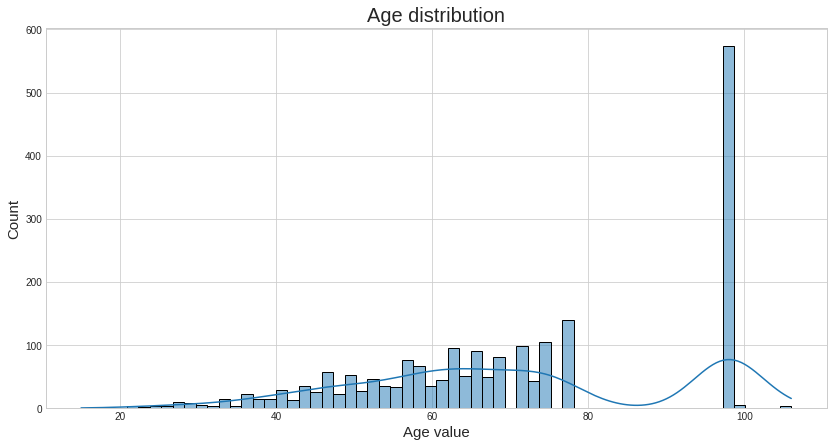

In [66]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["age"], bins=len(df_preprocessed["age"].unique()), kde=True)
plt.title('Age distribution', fontsize=20) 
plt.xlabel('Age value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

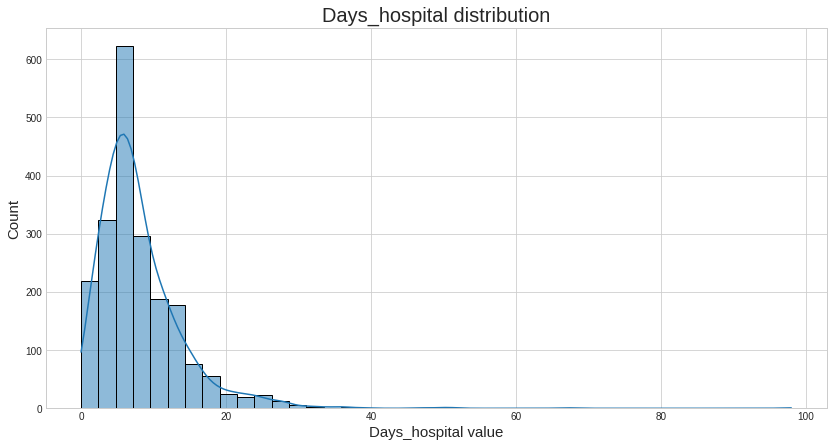

In [67]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["days_hospital"], bins=len(df_preprocessed["days_hospital"].unique()), kde=True)
plt.title('Days_hospital distribution', fontsize=20) 
plt.xlabel('Days_hospital value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

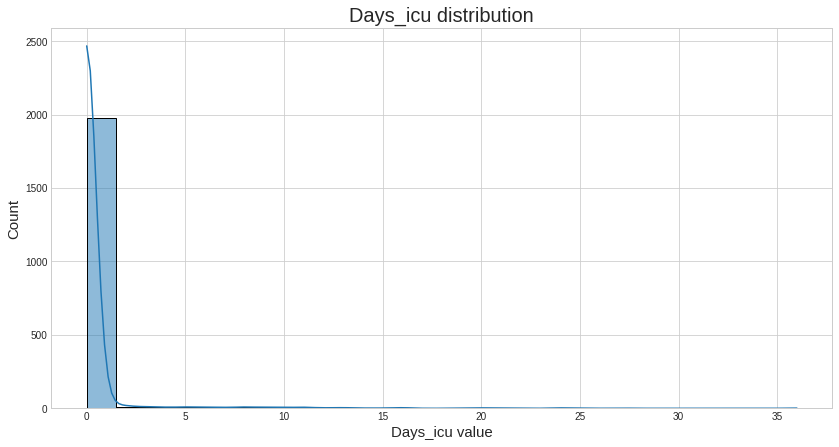

In [68]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["days_icu"], bins=len(df_preprocessed["days_icu"].unique()), kde=True)
plt.title('Days_icu distribution', fontsize=20) 
plt.xlabel('Days_icu value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

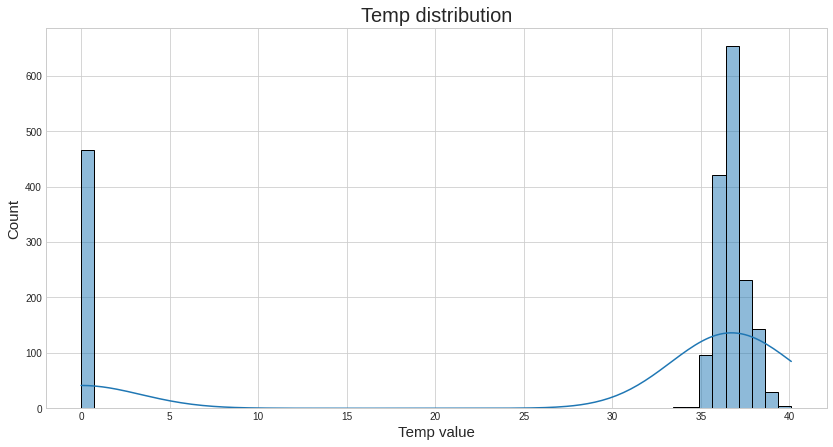

In [69]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["temp"], bins=len(df_preprocessed["temp"].unique()), kde=True)
plt.title('Temp distribution', fontsize=20) 
plt.xlabel('Temp value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

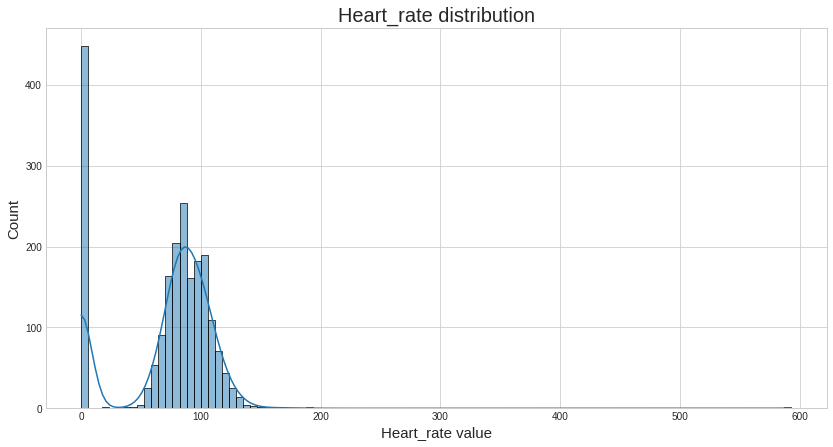

In [70]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["heart_rate"], bins=len(df_preprocessed["heart_rate"].unique()), kde=True)
plt.title('Heart_rate distribution', fontsize=20) 
plt.xlabel('Heart_rate value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

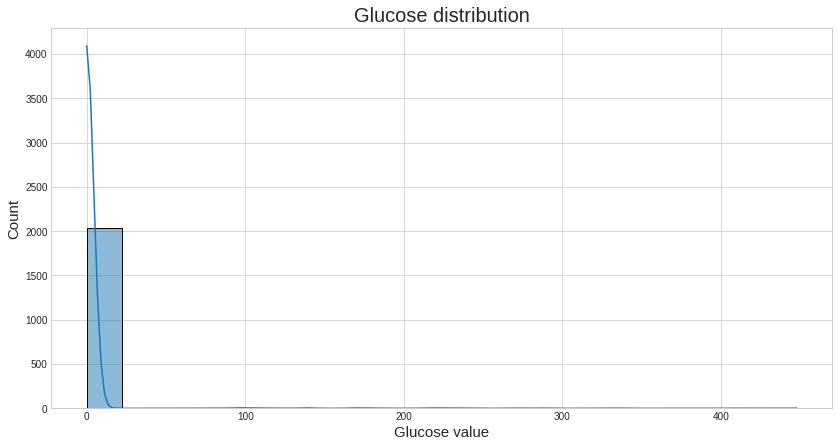

In [71]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["glucose"], bins=len(df_preprocessed["glucose"].unique()), kde=True)
plt.title('Glucose distribution', fontsize=20) 
plt.xlabel('Glucose value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

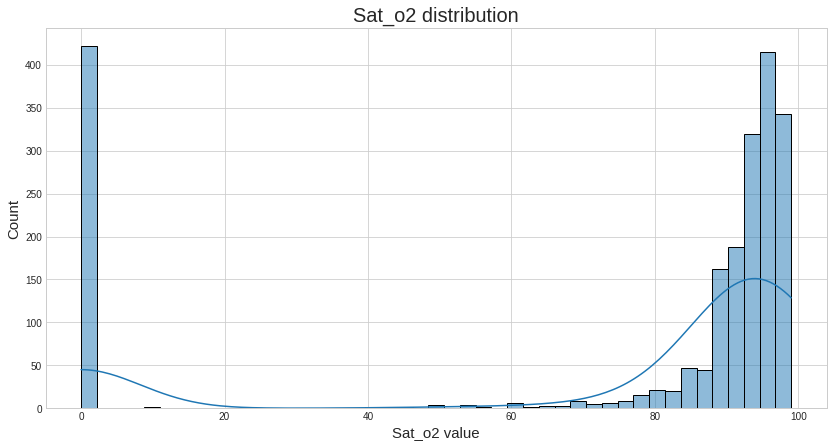

In [72]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["sat_o2"], bins=len(df_preprocessed["sat_o2"].unique()), kde=True)
plt.title('Sat_o2 distribution', fontsize=20) 
plt.xlabel('Sat_o2 value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

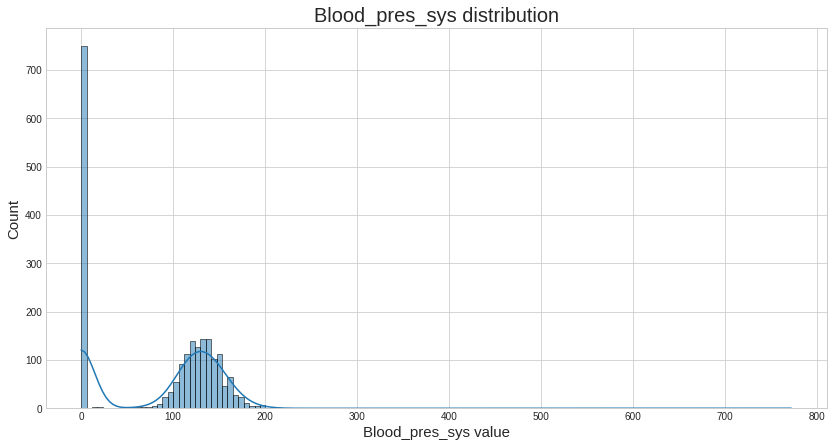

In [73]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["blood_pres_sys"], bins=len(df_preprocessed["blood_pres_sys"].unique()), kde=True)
plt.title('Blood_pres_sys distribution', fontsize=20) 
plt.xlabel('Blood_pres_sys value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

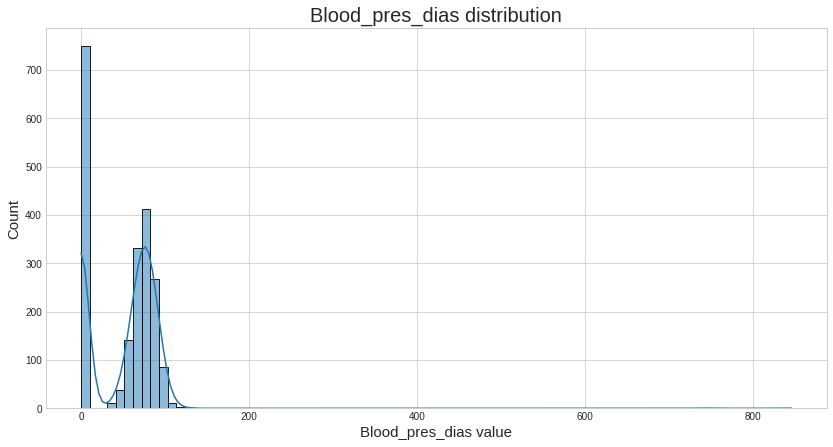

In [83]:
plt.figure(figsize=(14,7))
sns.histplot(data=df_preprocessed["blood_pres_dias"], bins=len(df_preprocessed["blood_pres_dias"].unique()), kde=True)
plt.title('Blood_pres_dias distribution', fontsize=20) 
plt.xlabel('Blood_pres_dias value', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.show()

/home/rafael/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


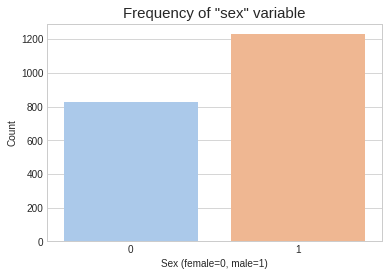

In [90]:
sns.countplot(df_preprocessed["sex"], palette=sns.color_palette("pastel"))
plt.title('Frequency of "sex" variable', fontsize=15) 
plt.xlabel('Sex (female=0, male=1)', fontsize=10) 
plt.ylabel('Count', fontsize=10) 
plt.show()

/home/rafael/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


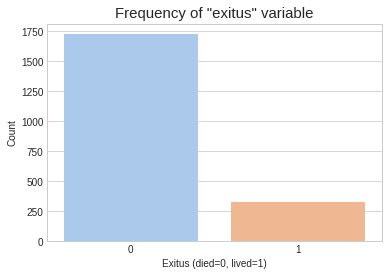

In [94]:
sns.countplot(df_preprocessed["exitus"], palette=sns.color_palette("pastel"))
plt.title('Frequency of "exitus" variable', fontsize=15) 
plt.xlabel('Exitus (died=0, lived=1)', fontsize=10) 
plt.ylabel('Count', fontsize=10) 
plt.show()

##### Box-plot

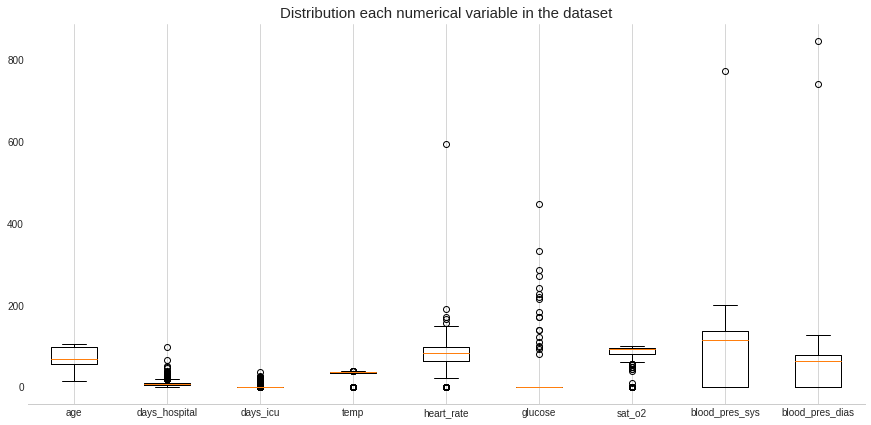

In [119]:
fig, ax = plt.subplots(figsize=(15, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution each numerical variable in the dataset', fontsize=15)

dataset = [df_preprocessed["age"], df_preprocessed["days_hospital"], df_preprocessed["days_icu"], df_preprocessed["temp"], df_preprocessed["heart_rate"], df_preprocessed["glucose"], df_preprocessed["sat_o2"], df_preprocessed["blood_pres_sys"], df_preprocessed["blood_pres_dias"]]
labels = ["age", "days_hospital", "days_icu", "temp", "heart_rate", "glucose", "sat_o2", "blood_pres_sys", "blood_pres_dias"]
ax.boxplot(dataset, labels=labels)
plt.show()


- Deleting age outlier

In [47]:
df_preprocessed.loc[df_preprocessed["age"] == 189.0, "age"] = 106

##### CDF (cumulative distributive function) and PDF (probability density function)

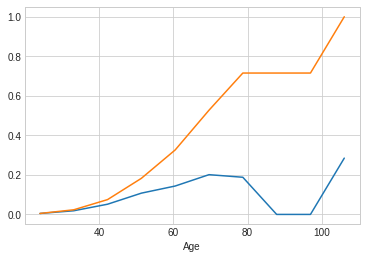

In [107]:
counts, bin_edges = np.histogram(df_preprocessed["age"], bins=10, density=True)

plt.xlabel("Age")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

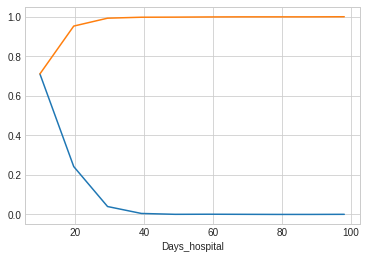

In [108]:
counts, bin_edges = np.histogram(df_preprocessed["days_hospital"], bins=10, density=True)

plt.xlabel("Days_hospital")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

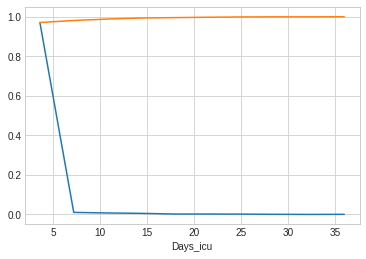

In [109]:
counts, bin_edges = np.histogram(df_preprocessed["days_icu"], bins=10, density=True)

plt.xlabel("Days_icu")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

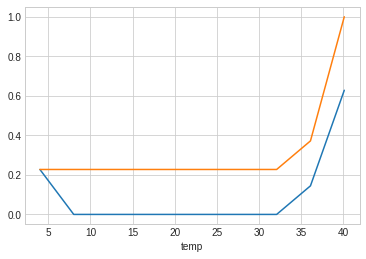

In [117]:
counts, bin_edges = np.histogram(df_preprocessed["temp"], bins=10, density=True)

plt.xlabel("temp")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

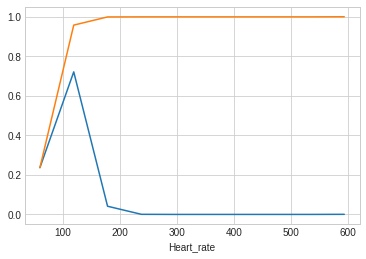

In [111]:
counts, bin_edges = np.histogram(df_preprocessed["heart_rate"], bins=10, density=True)

plt.xlabel("Heart_rate")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

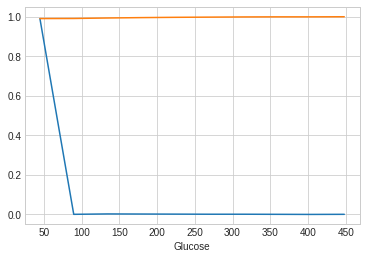

In [112]:
counts, bin_edges = np.histogram(df_preprocessed["glucose"], bins=10, density=True)

plt.xlabel("Glucose")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

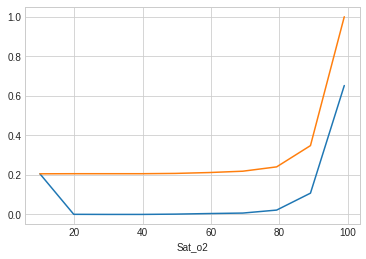

In [113]:
counts, bin_edges = np.histogram(df_preprocessed["sat_o2"], bins=10, density=True)

plt.xlabel("Sat_o2")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

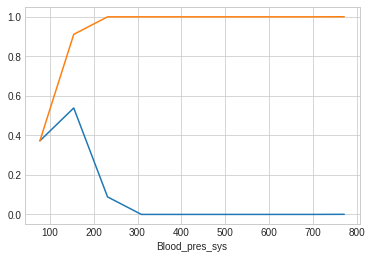

In [114]:
counts, bin_edges = np.histogram(df_preprocessed["blood_pres_sys"], bins=10, density=True)

plt.xlabel("Blood_pres_sys")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf) 

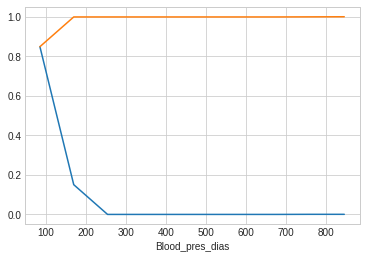

In [115]:
counts, bin_edges = np.histogram(df_preprocessed["blood_pres_dias"], bins=10, density=True)

plt.xlabel("Blood_pres_dias")
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

##### Bivariate analysis

In [48]:
print("Correlation matrix")
df_preprocessed.corr()

Correlation matrix


,sex,exitus,age,days_hospital,days_icu,temp,heart_rate,glucose,sat_o2,blood_pres_sys,blood_pres_dias
sex,1.000000,0.051838,-0.117938,0.067694,0.059960,0.010644,0.016608,0.006914,-0.001308,0.011245,0.015739
exitus,0.051838,1.000000,0.383729,-0.006680,0.146640,-0.032739,-0.017189,0.002188,-0.064693,0.036927,0.006846
age,-0.117938,0.383729,1.000000,0.041391,-0.034694,0.020444,-0.060515,0.003235,0.032619,0.117400,0.054842
days_hospital,0.067694,-0.006680,0.041391,1.000000,0.348364,-0.038066,-0.026610,-0.014042,-0.058222,-0.000978,0.008937
days_icu,0.059960,0.146640,-0.034694,0.348364,1.000000,-0.057480,-0.036581,-0.011728,-0.083945,-0.028983,-0.024658
temp,0.010644,-0.032739,0.020444,-0.038066,-0.057480,1.000000,0.742506,0.032950,0.841005,0.531313,0.473725
heart_rate,0.016608,-0.017189,-0.060515,-0.026610,-0.036581,0.742506,1.000000,0.028040,0.789945,0.524052,0.485434
glucose,0.006914,0.002188,0.003235,-0.014042,-0.011728,0.032950,0.028040,1.000000,0.036247,0.039495,0.025423
sat_o2,-0.001308,-0.064693,0.032619,-0.058222,-0.083945,0.841005,0.789945,0.036247,1.000000,0.558156,0.495471
blood_pres_sys,0.011245,0.036927,0.117400,-0.000978,-0.028983,0.531313,0.524052,0.039495,0.558156,1.000000,0.813789


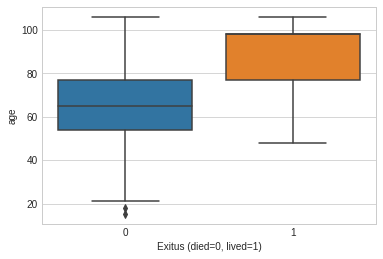

In [129]:
sns.boxplot(x="exitus", y="age", data=df_preprocessed)
plt.xlabel('Exitus (died=0, lived=1)', fontsize=10) 
plt.show()

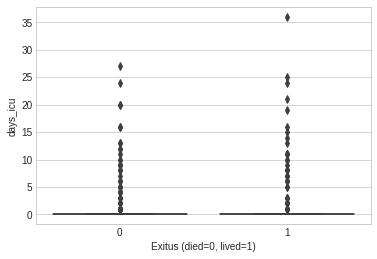

In [122]:
sns.boxplot(x="exitus", y="days_icu", data=df_preprocessed)
plt.xlabel('Exitus (died=0, lived=1)', fontsize=10) 
plt.show()

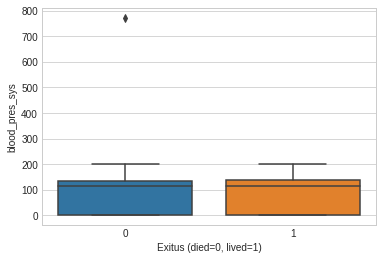

In [124]:
sns.boxplot(x="exitus", y="blood_pres_sys", data=df_preprocessed)
plt.xlabel('Exitus (died=0, lived=1)', fontsize=10) 
plt.show()

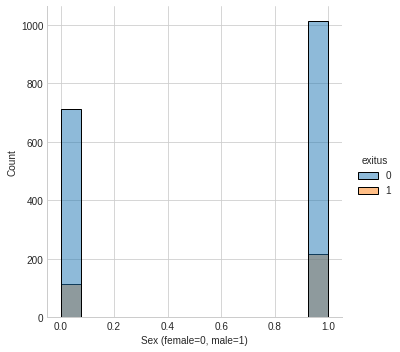

In [145]:
sns.displot(df_preprocessed, x="sex", hue="exitus")
plt.xlabel('Sex (female=0, male=1)', fontsize=10) 
plt.show()

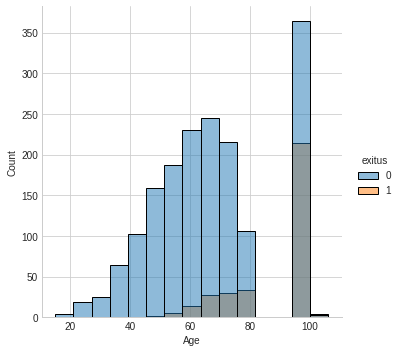

In [140]:
sns.displot(df_preprocessed, x="age", hue="exitus")
plt.xlabel('Age', fontsize=10) 
plt.show()

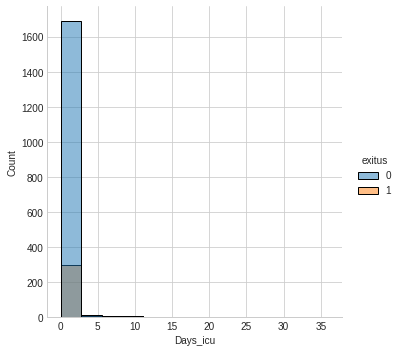

In [143]:
sns.displot(df_preprocessed, x="days_icu", hue="exitus")
plt.xlabel('Days_icu', fontsize=10) 
plt.show()

##### Multivariate analysis

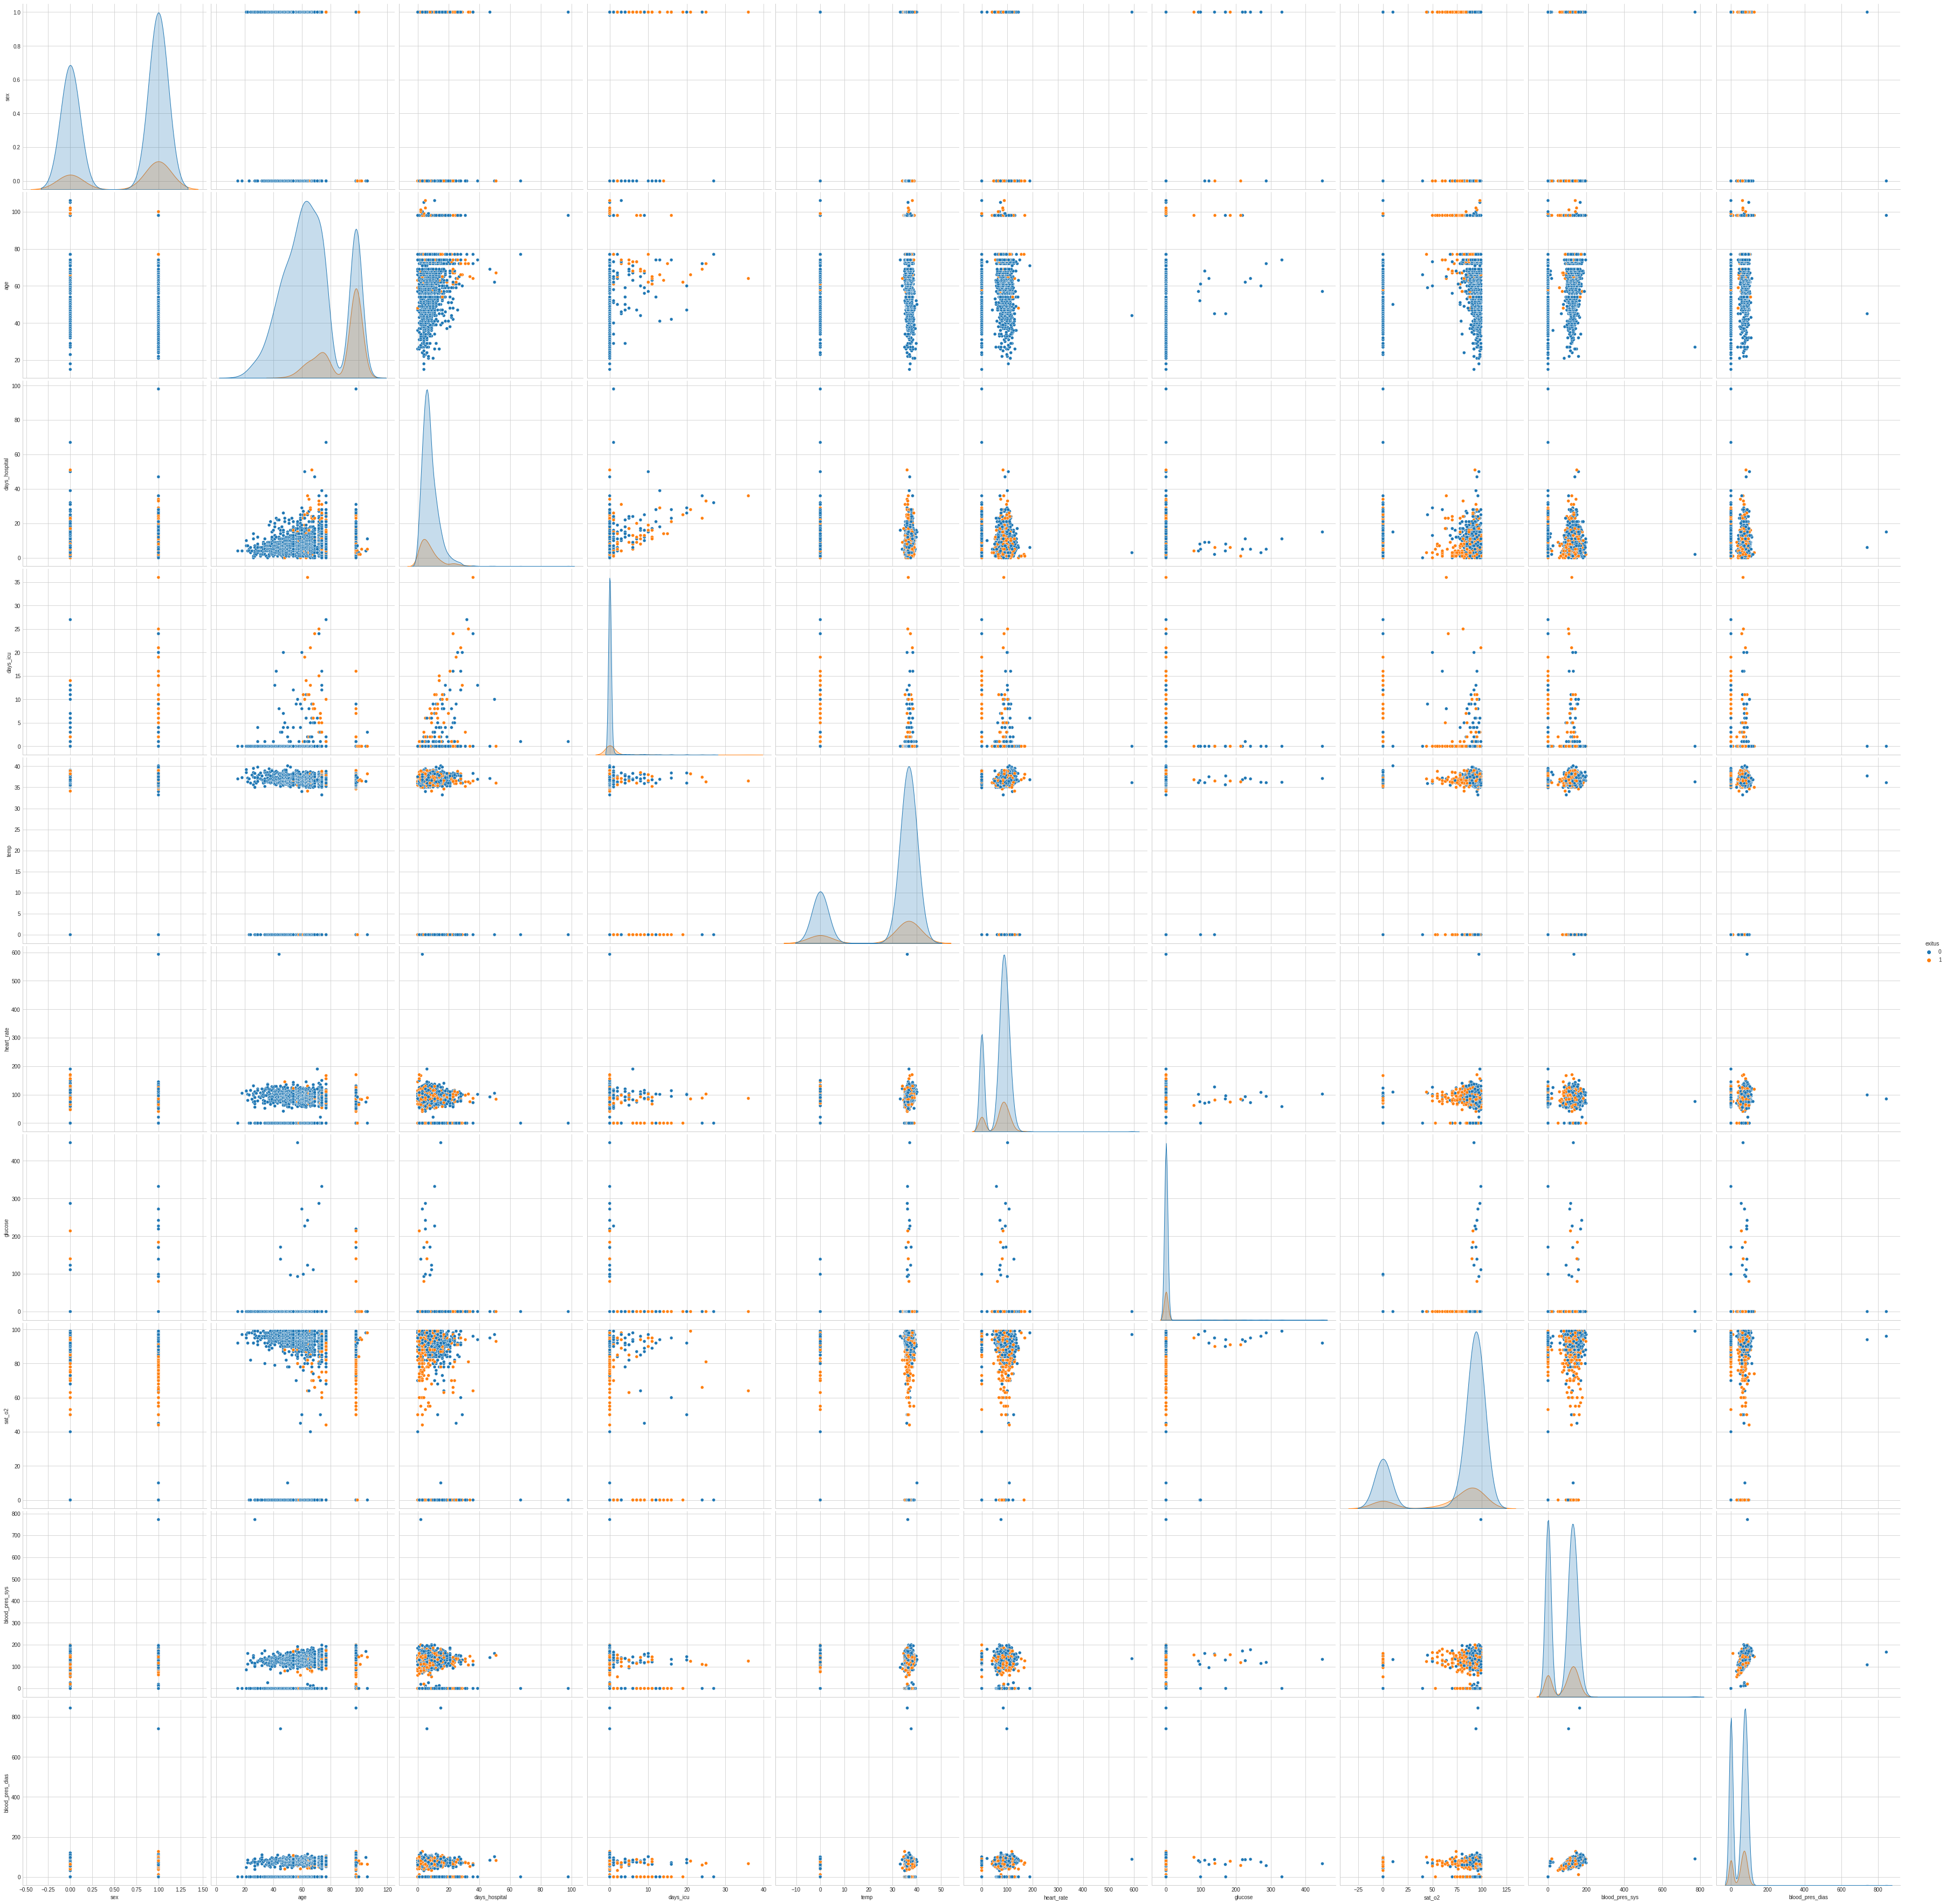

In [147]:
sns.pairplot(df_preprocessed, hue="exitus", height=5)
plt.show()

 https://purnasaigudikandula.medium.com/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

## Data preparation
Now you have your data, prepare it, clean it, store it properly, update it, and arrange it in a meaningful way when it is ready.

## Data problem research
Define your data problem and see if there are readily available solutions to it by service providers like Google Cloud, AWS or Azure, or any other API services. Try not to reinvent the wheel by building some generic models like recommender systems, OCRs, etc. These are now available in the plug-and-play fashion and are very cheap, cheaper than the time, energy, money, and computation power you will spend developing a half-accurate model.

## Predictive model and data transformation
Now quickly come up with simple models. Note that all solutions need not require machine learning or deep learning. Rule-based models work just as fine, sometimes even better. Transform your data based on a model that you have selected. In the first iteration, try all the simple models and decide on a benchmark.

## Testing validation
Define an evaluation metric based on your business problem and test your simple model in this metric. This metric will be your benchmark as we advance.

## Model evaluation
Based on your Validation, rework your model from step 6 and recalculate the evaluation metric to see if you can do better than the benchmark. It may happen that a simple model will solve your problem, but this is rare.
One more insight that you will get from steps 5 and 6 is your data is sufficient or not. You may have to spend some more time on steps 2 and 3 then.

## Solution deployment
Now that you are happy with the evaluation and this model solves your problem deploy the model based on your use case. The best way to consume your model is to build an API around it and integrate that into the solution.
If possible, deploy your model using Docker. Dockerization will help in easy deployment. Making an API around your model will help you upgrade without downtime.
Deployment is one thing that is primarily dependent on how you want to consume the model.

## Optimization
Optimization is the last step and perhaps most crucial step as well, as, and when you collect more data, you should upgrade your model and see if it is appropriately solving your purpose. Did it solve the business problem of step 1? If not! Start over.
